# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - identificação unica para cada venda
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros
- sqft_living - tamanho da casa em metros quadrados
- sqft_lot - tamanho do lote em metros quadrados
- floors - número de andares
- waterfront - vista para praia
- view - visitado
- condition - condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County)
- sqft_above - tamanho da área abaixo da casa em metros quadrados
- sqft_basement - tamanho do porão em metros quadrados
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - CEP
- lat - latitude
- long - longitude
- sqft_living15 - área da casa em 2015 (implica a algumas reformas). Isso pode ou não ter afetado a área do lote
- sqft_lot15 - área do lote em 2015 (implica a algumas reformas)

# Sobre este projeto

Este é o seu primeiro projeto usando Ciência de Dados. Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão linear e justificar

# Preparação do ambiente

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download.

# Exercicio 1. (0.5 pontos)

Formule ao menos duas perguntas que você acha que poderiam ser respondidas usando os dados

In [1]:
#carregamento dos dados e conversao em um objeto dataframe
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
#visualizacao 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#separacao em treino/teste e modelo de regressao
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar. Esta célula de texto esta escrito em Markdown, para renderizar o texto execute a célula com **Shift+Enter**)

O número de quartos em cada casa aumentou ou diminuiu ao longo do tempo? (bedrooms X yr_built)

Ter uma fonte d'água na frente da casa implica em aumento positivo na nota do imóvel? (waterfront x grade)

In [5]:
df.corr()['bedrooms']

id               0.001286
price            0.308350
bedrooms         1.000000
bathrooms        0.515884
sqft_living      0.576671
sqft_lot         0.031703
floors           0.175429
waterfront      -0.006582
view             0.079532
condition        0.028472
grade            0.356967
sqft_above       0.477600
sqft_basement    0.303093
yr_built         0.154178
yr_renovated     0.018841
zipcode         -0.152668
lat             -0.008931
long             0.129473
sqft_living15    0.391638
sqft_lot15       0.029244
Name: bedrooms, dtype: float64

In [6]:
df.corr()['waterfront']

id              -0.002721
price            0.266369
bedrooms        -0.006582
bathrooms        0.063744
sqft_living      0.103818
sqft_lot         0.021604
floors           0.023698
waterfront       1.000000
view             0.401857
condition        0.016653
grade            0.082775
sqft_above       0.072075
sqft_basement    0.080588
yr_built        -0.026161
yr_renovated     0.092885
zipcode          0.030285
lat             -0.014274
long            -0.041910
sqft_living15    0.086463
sqft_lot15       0.030703
Name: waterfront, dtype: float64

# Exercicio 2. (2.5 pontos)

A capacidade de comunicação é um dos principais pontos na análise de dados, pois sua análise deve ser tão boa quanto a sua capacidade de comunicá-la. Para isso usamos tabelas resumo e gráficos para apresentar os principais achados do trabalho realizado. Podemos adicionar outros materias que possam aprofundar essa apresentação como artigos e outros estudos realizados.

Assim, qual visualização você acha interessante destacar?

**RESPOSTA** (VALE 0.75 pontos): 

Para responder as perguntas levantadas na questão 1, acredito que gráficos de lineplot sejam a melhor opção por permitirem uma melhor visualização dos dados, sem poluir a visualização com tantos outliers e ruído.

Pergunta 1: O número de quartos em cada casa aumentou ou diminuiu ao longo do tempo? (bedrooms X yr_built)

<AxesSubplot:xlabel='yr_built', ylabel='bedrooms'>

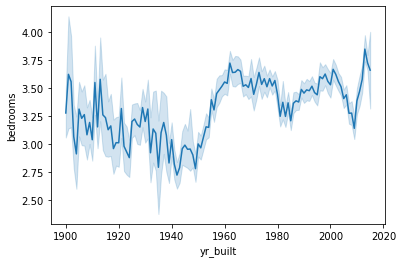

In [37]:
#### (VALE 1.5 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

sns.lineplot(x='yr_built', y='bedrooms', data=df)


Ter uma fonte d'água na frente da casa implica em aumento positivo na nota do imóvel? (waterfront x grade)

<AxesSubplot:xlabel='waterfront', ylabel='grade'>

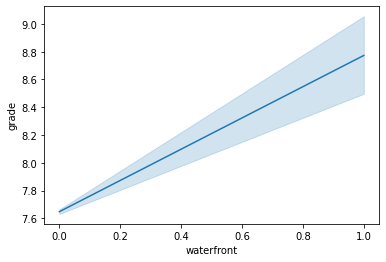

In [38]:
sns.lineplot(x='waterfront', y='grade', data=df)

A sua visualização responde uma das suas perguntas? Se não, o que ela responde?

**RESPOSTA** (VALE 0.75 pontos): 

As visualizações respondem sim. Na primeira visualização é possível perceber que entre 1940 e 1960 houve uma tendência de declínio no número de quartos nas casas, já entre 1960 e +/- 1970 percebe-se um pico no número de quartos e um segundo pico entre 2000 e 2020.

Já na segunda visualização, é possível ver claramente uma tendência de nota maior para casas com chafariz (fonte d'água/waterfront).

# Exercicio 3. (3 pontos)

Faremos uma analise exploratoria sobre estes dados, preencha abaixo analises sobre o conjunto de dados. Para isso a biblioteca numpy para obter a contagem, média, mediana e os quartis.

In [9]:
# VALE 0.75 pontos
# Substitua __ pelos valores solicitados (que mané .format)

mean = np.mean(df['sqft_living15']/10.764)
median = np.median(df['sqft_living15']/10.764)
quart_1 = np.percentile(df['sqft_living']/10.764, 25, method='midpoint')
quart_3 = np.percentile(df['sqft_living']/10.764, 75, method='midpoint')

print(f'Existem {len(df.index)} observações no conjunto de dados') #colocar em numpy
print(f'Existem {len(df.columns)} variáveis no conjunto de dados') #colocar em numpy
print(f'O tamanho médio das casa é de {mean:.2f} metros quadrados')
print(f'A mediana do tamanho das casas é de {median:.2f} metros quadrados')

# Quartis
print(f'Primeiro quartil {quart_1:.2f} do tamanho das casas')
print(f'Terceiro quartil {quart_3:.2f} do tamanho das casas')


Existem 21613 observações no conjunto de dados
Existem 21 variáveis no conjunto de dados
O tamanho médio das casa é de 184.56 metros quadrados
A mediana do tamanho das casas é de 170.94 metros quadrados
Primeiro quartil 132.57 do tamanho das casas
Terceiro quartil 236.90 do tamanho das casas


Neste conjunto de dados há casas com tamanho muito acima ou abaixo do esperado (outliers)? Faça um gráfico de caixa (boxplot) do tamanho das casas.

<AxesSubplot:xlabel='sqft_living'>

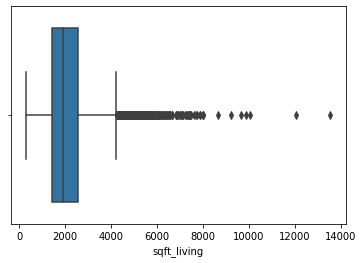

In [10]:
#### (VALE 0.75 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

sns.boxplot(x='sqft_living', data=df)

Observando a sua visualização, há casas com tamanhos muito abaixo ou acima do esperado (outliers)? 

**RESPOSTA** (VALE 0.75 pontos): 

Observando o gráfico, podemos perceber que há casas com tamanhos muito acima do esperado.

# Exercicio 4. (4 pontos)

Construa um modelo de regressão linear para predizer a variável **price** (preço) com **statsmodels.api**.

In [11]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X_train = df.drop(['date', 'id', 'price', 'zipcode'], axis=1)
y_train = df['price']

X = sm.add_constant(X_train)
model = sm.OLS(exog=X, endog=y_train).fit()


Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [12]:
#### (VALE 0.625 pontos)
#### EXECUTE O COMANDO ABAIXO

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:29:38   Log-Likelihood:            -2.9476e+05
No. Observations:               21613   AIC:                         5.895e+05
Df Residuals:                   21596   BIC:                         5.897e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.686e+07    1.6e+06    -23.105      0.000      -4e+07   -3.37e+07
bedrooms      -3.415e+04   1903.178    -17.945      0.000   -3.79e+04   -3.04e+04
bathrooms      4.216e+04   3276.490     12.868      0.000    3.57e+04    4.86e+04
sqft_living     108.7207      2.284     47.606      0.000     104.244     113.197
sqft_lot          0.1274      0.048      2.640      0.008       0.033       0.222
floors          760.6881   3605.813      0.211      0.833   -6306.972    7828.348
waterfront     5.878e+05   1.75e+04     33.625      0.000    5.54e+05    6.22e+05
view           4.943e+04   2146.437     23.028      0.000    4.52e+04    5.36e+04
condition      3.103e+04   2353.444     13.186      0.000    2.64e+04    3.56e+04
grade          9.722e+04   2166.897     44.866      0.000     9.3e+04    1.01e+05
sqft_above       70.7932      2.270     31.192      0.000      66.345      75.242
sqft_basement    37.9344      2.664     14.242      0.000      32.714      43.155
yr_built      -2456.2763     72.580    -33.842      0.000   -2598.539   -2314.014
yr_renovated     21.5324      3.680      5.850      0.000      14.318      28.746
lat            5.611e+05   1.05e+04     53.197      0.000     5.4e+05    5.82e+05
long           -1.17e+05    1.2e+04     -9.755      0.000   -1.41e+05   -9.35e+04
sqft_living15    27.4312      3.457      7.935      0.000      20.655      34.207
sqft_lot15       -0.3933      0.074     -5.330      0.000      -0.538      -0.249
==============================================================================
Omnibus:                    18537.369   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1882235.907
Skew:                           3.617   Prob(JB):                         0.00
Kurtosis:                      48.142   Cond. No.                     1.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.5e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Faça outro modelo usando a biblioteca **sklearn**.

In [13]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X = df.drop(['price', 'date', 'zipcode', 'id'], axis=1)
y = df['price']


In [14]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [15]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [16]:
X_std = StandardScaler().fit_transform(X)
print(X_std)

[[-0.39873715 -1.44746357 -0.97983502 ... -0.30607896 -0.9433552
  -0.26071541]
 [-0.39873715  0.1756067   0.53363434 ... -0.74634143 -0.43268619
  -0.18786773]
 [-1.47395936 -1.44746357 -1.42625404 ... -0.13565477  1.07013975
  -0.17237524]
 ...
 [-1.47395936 -1.77207762 -1.15404732 ... -0.60432128 -1.41025258
  -0.39414129]
 [-0.39873715  0.50022075 -0.52252773 ...  1.02891048 -0.8412214
  -0.42051149]
 [-1.47395936 -1.77207762 -1.15404732 ... -0.60432128 -1.41025258
  -0.41794772]]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=10)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
# Coeficiente de determinacao
r2_mod1_sk = r2_score(y_test, y_pred).round(3)

In [21]:
# Erro medio absoluto
mae_mod1_sk = mean_absolute_error(y_test, y_pred).round(3)

Qual o valor de ${R}^{2}$ e $MAE$ obtido?

In [22]:
print(f'R²: {r2_mod1_sk}, MAE: {mae_mod1_sk}')

R²: 0.697, MAE: 124397.309


**RESPOSTA** (VALE 0.5 pontos): R²: 0.697, MAE: 124397.309

Faça novamente um novo modelo utilizando a seleção de caracteristicas, selecionando as 5 variaveis mais importantes.

In [23]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X = df.drop(['price', 'date', 'zipcode', 'id'], axis=1)
y = df['price']
X_std = StandardScaler().fit_transform(X)

In [24]:
#construindo regressão linear
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.get_feature_names_out()

array(['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat'],
      dtype=object)

In [25]:
X = df[['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat']]
y = df['price']
X_std = StandardScaler().fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 10)

In [27]:
# Regressão Linear: treinamento
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [28]:
# métricas: R2
r2_mod2_sk = r2_score(y_test, y_pred).round(3)

In [29]:
# métricas: MAE
mae_mod2_sk = mean_absolute_error(y_test, y_pred).round(3)

Quais são as 5 variaveis mais importantes deste conjunto de dados?

In [30]:
selector.get_feature_names_out()

array(['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat'],
      dtype=object)

**RESPOSTA** (VALE 0.5 pontos): 'sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat'


Qual o valor de ${R}^{2}$ e $MAE$ deste novo modelo? Este modelo é melhor do que o anterior?

In [31]:
print(f'R²: {r2_mod2_sk}, MAE: {mae_mod2_sk}')

R²: 0.624, MAE: 147261.599


In [32]:
if r2_mod2_sk >= r2_mod1_sk and mae_mod2_sk >= mae_mod1_sk:
  print('A melhor escolha é o modelo 2')
else: 
  print('A melhor escolha é o modelo 1')

A melhor escolha é o modelo 1


**RESPOSTA** (VALE 0.5 pontos): 

R² do modelo 2: 0.624, MAE do modelo 2: 147261.599

O melhor modelo é o modelo 1